# **Project Title** -  Shopper Spectrum: Customer Segmentation and Product Recommendations in E-Commerce

##### **Project Type**    - Clustering, Recommendation system

# **Project Summary**-

**Shopper Spectrum** is a comprehensive data science project aimed at enhancing customer experience and boosting business growth in the e-commerce domain through intelligent customer segmentation and product recommendations. Leveraging transactional data from an online retail store, this project explores patterns in customer purchasing behavior to identify meaningful segments and recommend relevant products.

The project is divided into two major components:

**Customer Segmentation:**
Using RFM (Recency, Frequency, Monetary) analysis, customers are segmented based on how recently they purchased, how often they purchase, and how much they spend. These RFM features are normalized and clustered using unsupervised machine learning algorithms like K-Means, enabling businesses to label customers as High-Value, Regular, Occasional, or At-Risk. These segments are instrumental in crafting targeted marketing campaigns and improving retention strategies.

**Product Recommendation System:**
To personalize the shopping experience, the project builds an item-based collaborative filtering system. Using a customer-product matrix and cosine similarity, it identifies and recommends the top 5 similar products to a given item, enabling cross-selling and increasing average order value.

Finally, a Streamlit web application is developed to make the solution interactive and user-friendly. The app allows users to:
- Input a product name and get relevant recommendations
- Enter RFM values and get a predicted customer segment label

Through this project, we demonstrate how data-driven insights can transform raw e-commerce transaction data into actionable business intelligence, aiding in customer retention, inventory planning, and revenue optimization.



# **Problem Statement**


E-commerce companies collect a lot of data from customer purchases, but they often struggle to use this data effectively. This project solves two key problems:

- **How to group customers based on their buying behavior** using RFM (Recency, Frequency, Monetary) analysis.

- **How to recommend similar products** to what a customer has already bought, using collaborative filtering.

By doing this, businesses can better target customers with the right offers and improve the overall shopping experience.

# ***Let's Begin !***

## ***Know Your Data***


### Import Libraries

In [36]:
## Data Handling
import pandas as pd
import numpy as np

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

##  Recommendation System
from sklearn.metrics.pairwise import cosine_similarity

## Utility
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

## Streamlit (only for deployment step)
# import streamlit as st


### Load Dataset

In [3]:
data = pd.read_csv("online_retail.csv")

### Dataset First View

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


### Dataset Rows and Columns

In [5]:
#Check number of rows  and columns
print("Total number of rows and columns:", data.shape)

Total number of rows and columns: (541909, 8)


### Dataset Information

In [6]:
#Info dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Check for duplicate values

In [7]:
print("Duplicated values in dataset are:\n", data.duplicated().sum())

Duplicated values in dataset are:
 5268


### Check for missing values

In [8]:
print("Missing values in the dataset are", data.isnull().sum())

Missing values in the dataset are InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


### What did you know about your dataset?

After observing the dataset, following observations are made:

- There are 541909 rows and 8 columns in dataset.

- There are  1454 missing values in description and 135080 missing valeus in CustomerID.

- There are 5268 duplicated records in the dataset.

- Data preview with columns like InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country



## ***Understanding Your Variables***

In [9]:
# Columns in dataset
print("Columns in dataset are:", data.columns)

Columns in dataset are: Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


### Summary statistics

In [10]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Check Unique Values for Each Column

In [11]:
data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

## ***Data Preprocessing & Cleaning***

##### **Cleaning Objectives:**
1. Remove rows with missing `CustomerID` – essential for customer-based segmentation.
2. Remove cancelled transactions – identified by `InvoiceNo` starting with 'C'.
3. Remove entries with negative or zero `Quantity` or `UnitPrice`.
4. Remove duplicate entries.
5. Remove rows with missing product `Description` (important for recommendations).
6. Convert `InvoiceDate` to datetime format.
7. Add a `TotalPrice` column = `Quantity × UnitPrice`.

In [12]:
# Remove rows with missing CustomerID
data_cleaned = data.dropna(subset=['CustomerID'])

In [13]:
# Remove cancelled invoices (InvoiceNo starting with 'C')
data_cleaned = data_cleaned[~data_cleaned['InvoiceNo'].astype(str).str.startswith('C')]

In [14]:
# Remove rows with Quantity ≤ 0 or UnitPrice ≤ 0
data_cleaned = data_cleaned[(data_cleaned['Quantity'] > 0) & (data_cleaned['UnitPrice'] > 0)]

In [15]:
# Remove duplicate records
data_cleaned = data_cleaned.drop_duplicates()

In [16]:
# Drop rows with missing Description (useful for recommendation system)
data_cleaned = data_cleaned.dropna(subset=['Description'])

In [17]:

# Convert InvoiceDate to datetime
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])

In [18]:
# Add new column: TotalPrice = Quantity × UnitPrice
data_cleaned['TotalPrice'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']

In [19]:
# View the cleaned dataset
print("Cleaned dataset shape:", data_cleaned.shape)

Cleaned dataset shape: (392692, 9)


In [20]:
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


##### Post-Cleaning Summary:
- Rows remaining after cleaning: **392692**
- Columns retained: **['InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','CustomerID','Country','TotalPrice']**

## ***Exploratory Data Analysis***

### Transactions Value by country

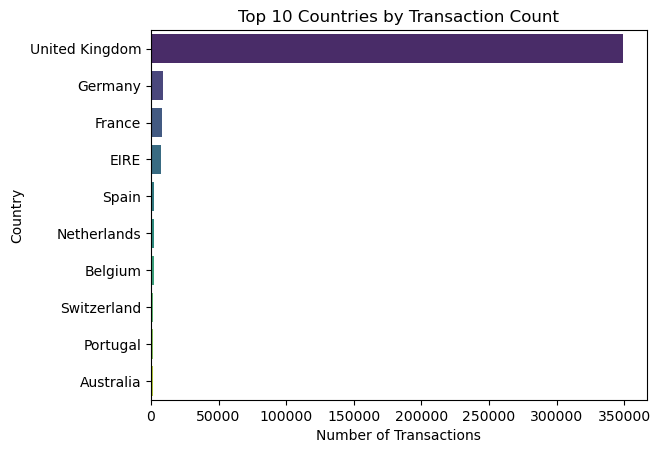

In [21]:
top_countries = data_cleaned['Country'].value_counts().head(10)

sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Countries by Transaction Count")
plt.xlabel("Number of Transactions")
plt.ylabel("Country")
plt.show()

**Insights:**

1. United Kingdom Dominates:

With ~350,000 transactions, the UK vastly outpaces all other countries.

This indicates that the business is UK-centric, likely headquartered or primarily operating there.

2. Other Top Countries (but far behind):

Germany, France, and Ireland (EIRE) follow—but each has under 20,000 transactions.

This stark drop shows that international reach exists but is limited in scale.

3. Long Tail Distribution:

Countries like Spain, Netherlands, Belgium, Switzerland, Portugal, and Australia show much smaller transaction volumes, contributing marginally to the total.

### Top Selling Products

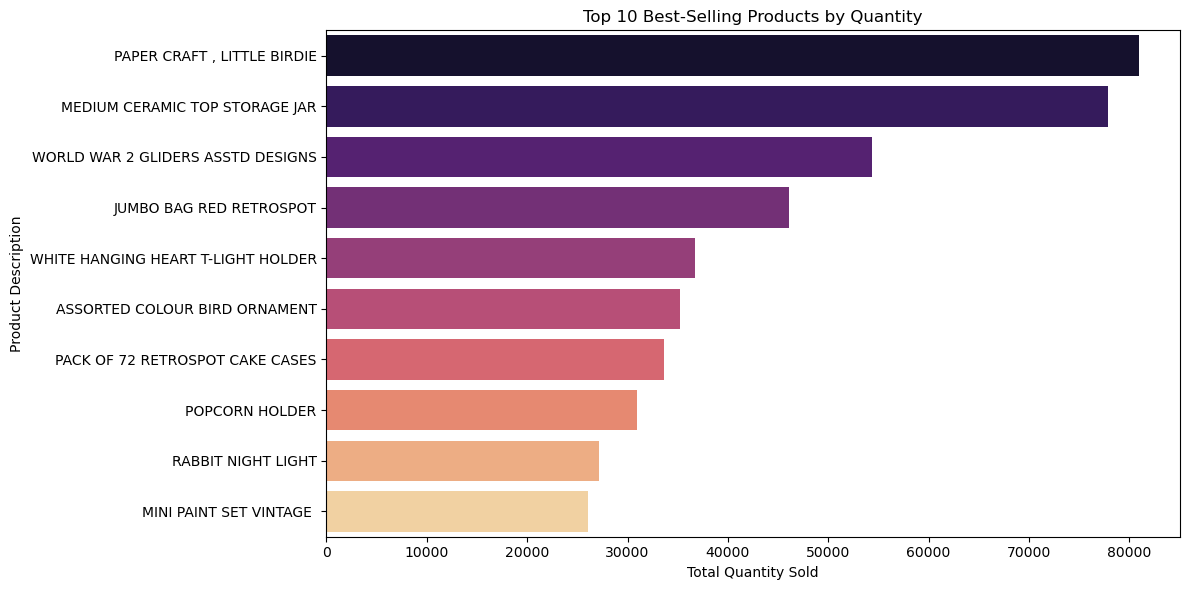

In [22]:
# Top 10 most sold products
top_products = data_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="magma")
plt.title('Top 10 Best-Selling Products by Quantity')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()


**Insights:**

1. Top-Seller:

"PAPER CRAFT , LITTLE BIRDIE" leads significantly with over 80,000 units sold, indicating strong customer preference—possibly due to affordability, popularity as a gift item, or promotional bundling.

2. Runner-Ups:

"MEDIUM CERAMIC TOP STORAGE JAR" and "WORLD WAR 2 GLIDERS ASSTD DESIGNS" follow closely, with 70k–60k units sold, showing high utility and appeal for storage and novelty purposes.

3. Decorative & Gift Items Dominate:

Products like T-Light Holders, Bird Ornaments, and Cake Cases suggest that customers are primarily purchasing home decor and festive items, aligning with a gifting or event-oriented market behavior.

4. Utility + Novelty Mix:

Items like Storage Jars, Popcorn Holders, and Rabbit Night Lights show a blend of functional and whimsical products catering to diverse tastes.



### Visualize Purchase Trends Over Time

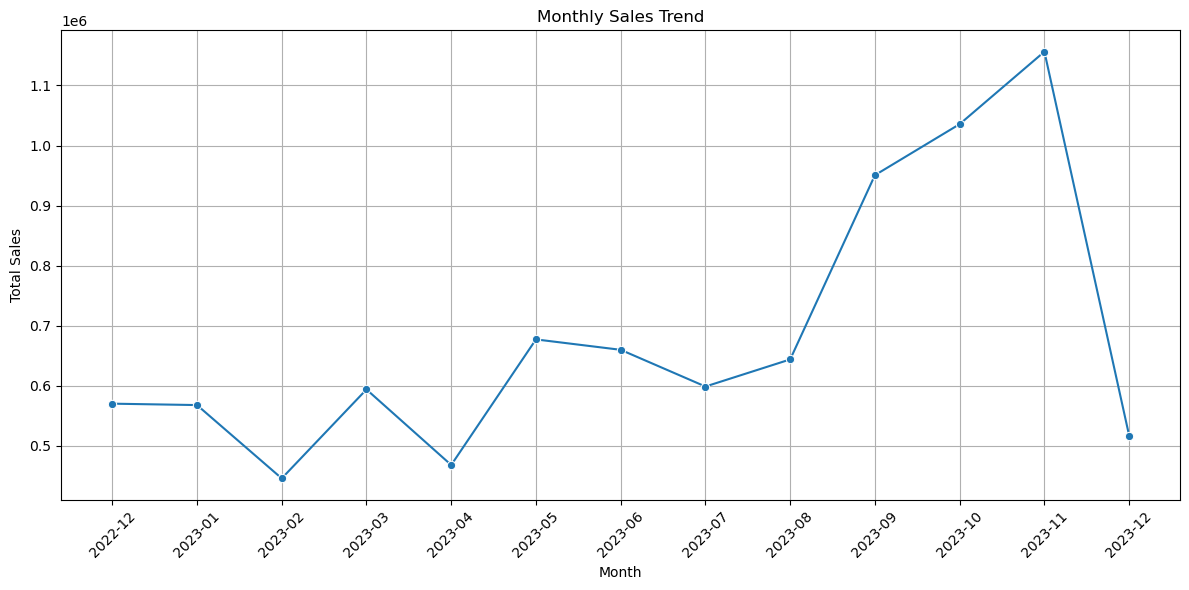

In [23]:
# Convert InvoiceDate to datetime if not already
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])

# Create a new column for Month-Year
data_cleaned['InvoiceMonth'] = data_cleaned['InvoiceDate'].dt.to_period('M')

# Aggregate total sales (Quantity * UnitPrice) by Month
data_cleaned['Sales'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']
monthly_sales = data_cleaned.groupby('InvoiceMonth')['Sales'].sum().reset_index()
monthly_sales['InvoiceMonth'] = monthly_sales['InvoiceMonth'].astype(str)

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='InvoiceMonth', y='Sales', data=monthly_sales, marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


**Insights:**

1. Sales Surge in Q4:

Sales peak in November 2023, suggesting strong seasonal demand—possibly linked to holiday shopping, festive offers, or end-of-year campaigns.

2. Dip in Early 2023 & Year-End:

February 2023 and December 2023 show the lowest sales, hinting at post-holiday slowdowns or reduced marketing activities.

3. Gradual Build-Up Mid-Year:

Sales begin rising steadily from May to August, indicating increasing customer activity and possibly restocking or promotional cycles.

4. Volatile Start:

From December 2022 to April 2023, the market shows fluctuations, likely due to unpredictable demand or inconsistent customer engagement.

5. Sharp Growth Phase:

September to November 2023 marks the strongest growth streak, signaling a period of high conversions, possibly driven by strategic campaigns or festive product line

### Monetary Distribution per Transaction and per Customer

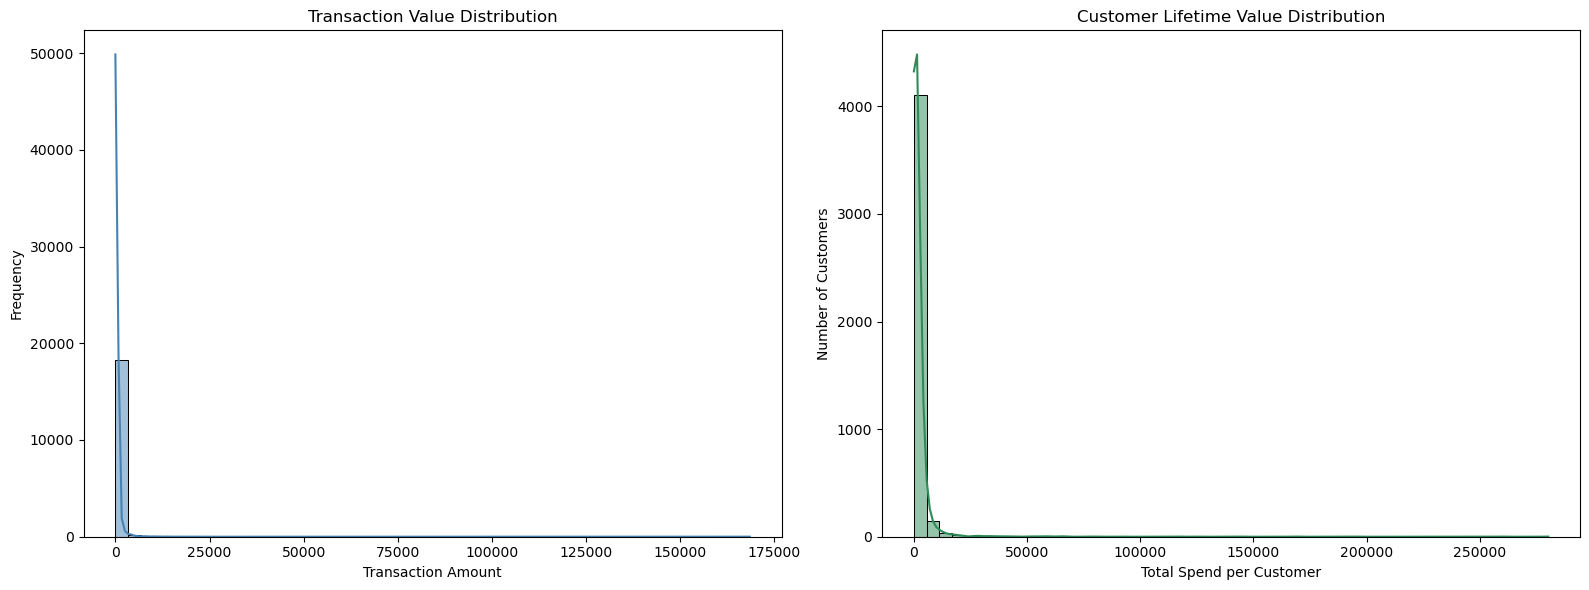

In [24]:
# Calculate total value per transaction
data_cleaned['TotalPrice'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']
transaction_total = data_cleaned.groupby('InvoiceNo')['TotalPrice'].sum().reset_index()
customer_total =data_cleaned.groupby('CustomerID')['TotalPrice'].sum().reset_index()

plt.figure(figsize=(16, 6))

# --- Distribution of Transaction Amounts ---
plt.subplot(1, 2, 1)
sns.histplot(transaction_total['TotalPrice'], bins=50, kde=True, color='steelblue')
plt.title('Transaction Value Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

# --- Distribution of Total Spend per Customer ---
plt.subplot(1, 2, 2)
sns.histplot(customer_total['TotalPrice'], bins=50, kde=True, color='seagreen')
plt.title('Customer Lifetime Value Distribution')
plt.xlabel('Total Spend per Customer')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()


**Insights:**
- Transaction Value Distribution (Left Chart):
1. Highly Skewed Distribution:

- Most transactions are concentrated at the lower end of the value spectrum (below ₹2,000).
- The frequency sharply drops as the transaction amount increases.

2. Low-Value Dominance:

- Majority of purchases are low-cost, impulse buys, possibly for decorative or gifting items.
- Suggests that the business thrives on high-volume, low-value transactions.

3. Few High-Value Outliers:

- A small number of transactions exceed ₹10,000–₹50,000, indicating occasional bulk purchases or B2B activity.

- Customer Lifetime Value (CLV) Distribution (Right Chart):
1. Skewed CLV Pattern:

- Most customers have lifetime spending below ₹5,000.
- The curve steeply declines, with only a handful of customers contributing significantly higher lifetime revenue.

2. 80/20 Rule Reflection:

- Likely that ~20% of customers account for a large portion of revenue.
- Indicates potential to segment high-value repeat customers for loyalty programs.

3. Opportunity for Growth:

- Upselling or subscription models could target mid-range customers to push them toward higher CLV.

### RFM distribution

#### Generate the RFM Table

In [25]:
# Reference date (typically one day after the last invoice date)
reference_date = data_cleaned['InvoiceDate'].max() + pd.Timedelta(days=1)

# RFM Calculation
rfm = data_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'TotalPrice': 'sum'                                        # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

#### RFM Score Segmentation

In [26]:
# Assign scores from 1 to 4 using quartiles
rfm['R'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm['M'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

# Combine RFM score into a single segment
rfm['RFM_Score'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)


####  View RFM Table

In [27]:
print(rfm.head())


   CustomerID  Recency  Frequency  Monetary  R  F  M RFM_Score
0     12346.0      326          1  77183.60  1  1  4       114
1     12347.0        2          7   4310.00  4  4  4       444
2     12348.0       75          4   1797.24  2  3  4       234
3     12349.0       19          1   1757.55  3  1  4       314
4     12350.0      310          1    334.40  1  1  2       112


####  Distribution Plots (EDA of R, F, M)

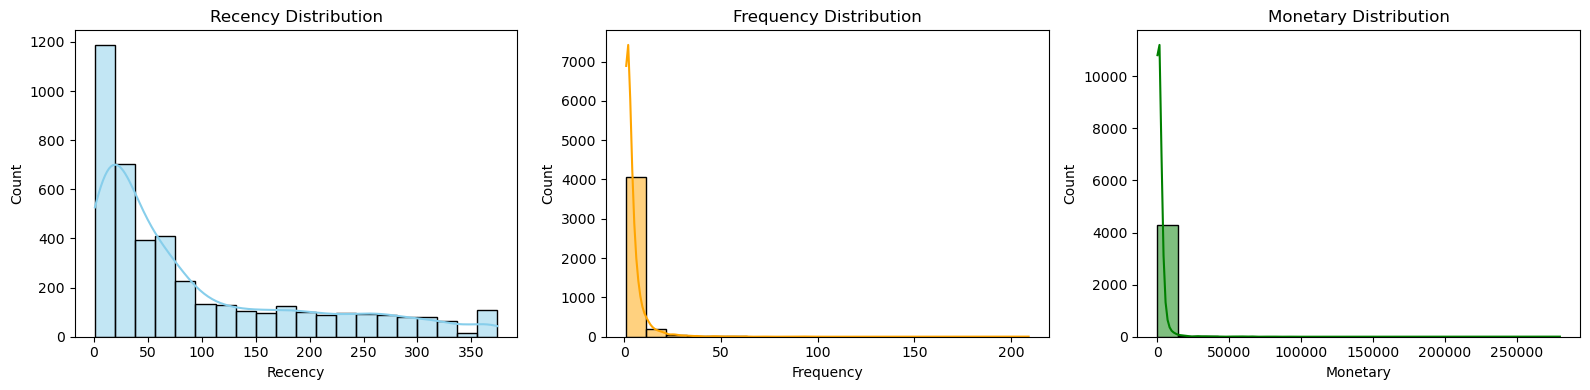

In [28]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], bins=20, kde=True, color='skyblue')
plt.title('Recency Distribution')

plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], bins=20, kde=True, color='orange')
plt.title('Frequency Distribution')

plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], bins=20, kde=True, color='green')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

**Insights:**

1. Recency Distribution Insights:

- The majority of customers (1200+) purchased very recently, i.e., within 0–30 days.

- There is a steep drop in recent activity beyond 50 days — fewer customers are inactive for longer periods.

- This indicates a strong base of currently engaged or recently active customers.

- Tail end (>200 days) still exists, suggesting there are dormant or lost customers worth re-engagement campaigns.

2. Frequency Distribution Insights:

- Most customers made very few purchases — typically 1–5 orders.

- The distribution is heavily right-skewed, with very few loyal/repeat customers having >30 purchases.

- This shows the business relies heavily on one-time or infrequent buyers.

- Retention strategies could be useful to encourage second purchases and build loyalty.

3. Monetary Distribution Insights:

- Most customers spend under $1,000, with a large concentration in the lowest bin.

- There's a long tail with some high spenders, where a few customers contribute disproportionately high revenue.

- This Pareto-like behavior (80/20 rule) indicates VIP customers exist, and targeted efforts to retain them can yield large gains.

- Customer segmentation can help prioritize high-value clients for personalized offers.

### Customer behavior segmentation

#### Assign Customer Segments from RFM_Score

In [29]:
# Define segments based on combined RFM scores or custom logic
def segment_customer(rfm):
    r = int(rfm['R'])
    f = int(rfm['F'])
    m = int(rfm['M'])
    
    if r == 4 and f == 4 and m == 4:
        return 'Champions'
    elif r >= 3 and f >= 3:
        return 'Loyal Customers'
    elif r >= 3 and f <= 2:
        return 'Potential Loyalist'
    elif r == 2 and f == 2:
        return 'Need Attention'
    elif r <= 2 and f >= 3:
        return 'At Risk'
    elif r <= 2 and f <= 2:
        return 'Hibernating'
    else:
        return 'Others'

# Apply segmentation
rfm['Segment'] = rfm.apply(segment_customer, axis=1)


#### Segment Heatmap (Count of Customers by R-F Score Pair)

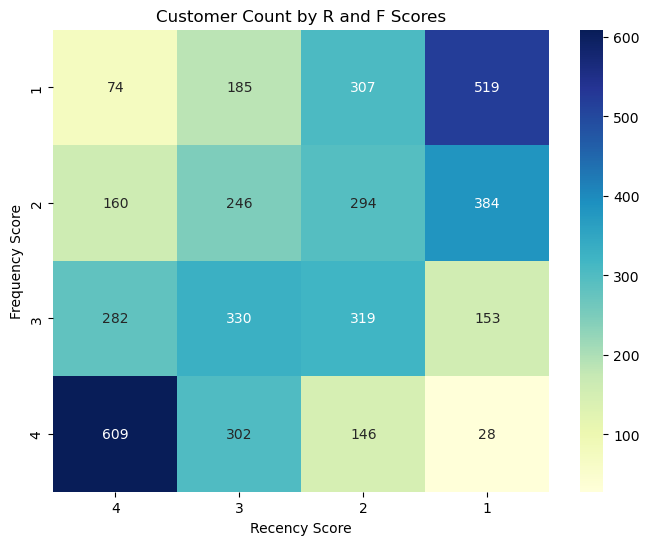

In [30]:
# Create a pivot table for heatmap
segment_heatmap = rfm.pivot_table(index='F', columns='R', values='CustomerID', aggfunc='count').fillna(0)

plt.figure(figsize=(8,6))
sns.heatmap(segment_heatmap, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Customer Count by R and F Scores')
plt.xlabel('Recency Score')
plt.ylabel('Frequency Score')
plt.show()


**Insights:**
 1. Champions (R=4, F=4) → 609 Customers
- These are your most valuable customers: they purchased recently and frequently.
- This segment is ideal for loyalty programs, early access, and premium services.

Retention Strategy: Reward with exclusive discounts or early product launches.

2. Loyal Customers (R=3 or 4, F=3 or 4) → High values in (3,3), (3,4), (4,3)
Cells (3,3): 330, (3,4): 282, (4,3): 302
- These customers buy often and have recent activity.
- Engage them with loyalty offers, feedback surveys, or referrals.
- Can be converted to Champions with strategic campaigns.

3. Potential Loyalists (R=3-4, F=2) → Cells (3,2): 319, (4,2): 146
- Recently active but less frequent.
- These may be new customers or occasional buyers showing promise.

Strategy: Personalized email follow-ups and incentives for next purchase.

4. At Risk or Lapsing Customers (R=1-2, F=3-4) → (1,4): 519, (2,4): 384
- These were frequent buyers but have not bought recently.
- They are slipping away; at risk of churn.

Strategy: Reactivation campaigns, limited-time offers, or surveys to understand drop-off.

5. Hibernating / Lost (R=1-2, F=1-2) → e.g., (1,1): 74, (2,1): 160
- Low scores on both recency and frequency.
- Might be inactive or one-time customers.

Strategy: Send win-back emails, or remove from active lists.

**Heatmap Concentration Insight**
- Strong customer clusters:

(R=4, F=4) → 609

(R=3, F=3) → 330

(R=3, F=4) → 282

(R=2, F=3) → 294
- Decline seen as R drops: higher frequency still exists even with low recency → indicating churn risk.
- Balance of retention & re-engagement is key.

#### Countplot of Final Named Segments

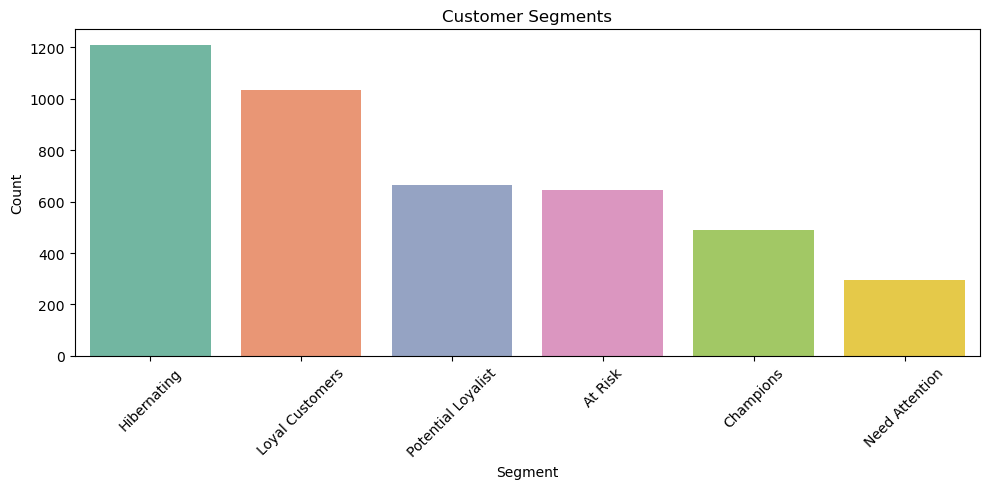

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index, palette='Set2')
plt.title('Customer Segments')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Insights:**
| Segment                   | Count      | Insights & Actions                                                                                                                                                                                           |
| ------------------------- | ---------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **Hibernating**        | **\~1200** | Largest segment. These customers haven’t purchased in a long time and weren’t very active earlier either. <br **Action**: Win-back campaigns, discount emails, or consider removal from active marketing. |
| **Loyal Customers**    | **\~1050** | High frequency and moderate recency. Valuable segment with regular engagement. <br> **Action**: Strengthen relationship through loyalty programs, early access to sales, or personalized offers.           |
| **Potential Loyalist** | **\~670**  | Recently purchased but not often. These customers show promise. <br> **Action**: Encourage repeat purchases with tailored follow-ups and small incentives.                                                 |
| **At Risk**            | **\~650**  | Used to buy frequently but haven’t returned recently. This segment is critical. <br>**Action**: Send “We miss you” emails, feedback surveys, or time-sensitive offers.                                    |
| **Champions**          | **\~500**  | Recently active and high frequency. Your **best and most loyal** customers. <br> **Action**: Reward them. VIP benefits, thank-you messages, or referral bonuses.                                           |
| **Need Attention**     | **\~300**  | Moderate recency, lower frequency. Possibly new or disengaging. <br> **Action**: Monitor behavior, send engaging content, and test nurturing campaigns.                                                    |


### Elbow curve for cluster selection

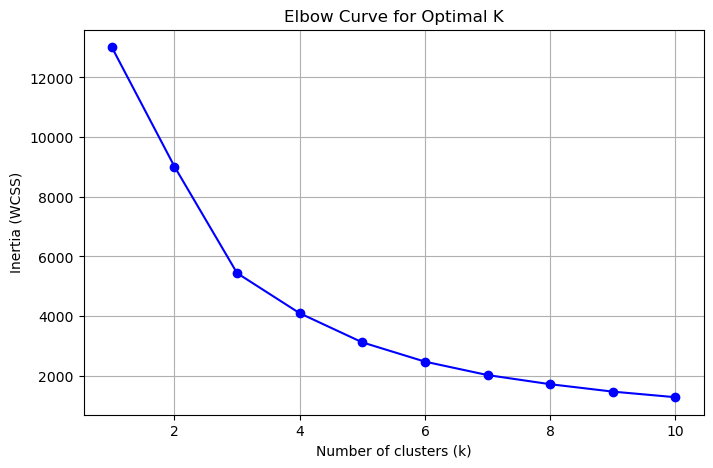

In [32]:

# Select RFM features for clustering
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']]

# Scale the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

# Elbow method to find optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Curve for Optimal K')
plt.grid(True)
plt.show()


**Insights:**
1. Sharp Decline in Inertia up to 3 Clusters:
- Moving from 1 to 3 clusters reduces inertia dramatically (from ~13,000 to ~5,500).
- This indicates substantial improvement in how well the clustering fits the data.

2. Elbow Point Observed Around k=3 or k=4:
- After k=3 or k=4, the curve noticeably flattens.
- This suggests that adding more clusters yields only marginal benefits.

3. Diminishing Returns Beyond 4 Clusters:
- From k=5 to k=10, inertia decreases slowly, indicating that extra clusters mostly capture small variations or noise rather than meaningful structure.

4. Optimal Number of Customer Segments:
- The elbow curve strongly suggests that 3 or 4 clusters are the most appropriate choice to balance segmentation quality and simplicity.

### Customer Cluster Profiles

In [34]:
# Select relevant RFM columns
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']]

# Scale the features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

# Apply KMeans with optimal k (assume k=4 based on Elbow)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
# Aggregate RFM values by cluster
cluster_profiles = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(2)
cluster_counts = rfm['Cluster'].value_counts().sort_index()

# Add counts to the profiles
cluster_profiles['Num_Customers'] = cluster_counts

print(cluster_profiles)


         Recency  Frequency   Monetary  Num_Customers
Cluster                                              
0          43.70       3.68    1353.63           3054
1         248.08       1.55     478.85           1067
2           7.38      82.54  127187.96             13
3          15.50      22.33   12690.50            204


**Insights:**
| Cluster | Recency ↓  | Frequency ↑ | Monetary ↑  | Customers | Interpretation                                                                                                                                                                                                  |
| ------- | ---------- | ----------- | ----------- | --------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **2**   | **7.38**   | **82.54**   | **127,188** | 13        |  **Champions**: These are **very recent, extremely frequent, and high-value customers**. Small in number but extremely valuable. You must prioritize retention, offer loyalty programs, or ask for referrals. |
| **3**   | 15.50      | 22.33       | 12,690.50   | 204       |  **Loyal Customers**: Active and profitable customers who purchase regularly. They aren't as high-spending as Cluster 2 but still contribute significantly. Focus on upselling/cross-selling.                 |
| **0**   | 43.70      | 3.68        | 1,353.63    | 3054      |  **Potential Loyalists**: These customers are relatively recent but buy less often and spend modestly. Engage them with personalized offers to increase frequency and spending.                               |
| **1**   | **248.08** | **1.55**    | **478.85**  | 1067      |  **At Risk / Lost**: These customers haven't purchased in a long time, rarely bought, and spent little. Consider reactivation campaigns or remove from targeting if unresponsive.                             |


#### Radar Plot

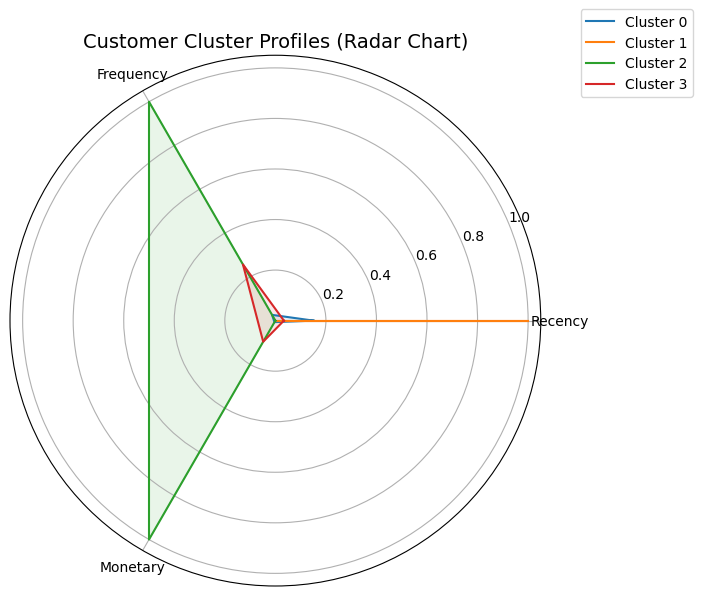

In [37]:
# Remove 'Num_Customers' before normalization
cluster_rfm_only = cluster_profiles.drop('Num_Customers', axis=1)

# Normalize RFM values (0 to 1 range) for radar chart
scaler = MinMaxScaler()
cluster_scaled = scaler.fit_transform(cluster_rfm_only)

# Radar chart setup
labels = cluster_rfm_only.columns.tolist()
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Plot each cluster
plt.figure(figsize=(8, 6))
for i, row in enumerate(cluster_scaled):
    values = row.tolist()
    values += values[:1]  # close the polygon
    plt.polar(angles, values, label=f'Cluster {i}')
    plt.fill(angles, values, alpha=0.1)

# Add labels and styling
plt.xticks(angles[:-1], labels)
plt.title('Customer Cluster Profiles (Radar Chart)', fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

**Insights:**
🔹 Cluster 0 (Blue):
- Low Recency: Customers purchase relatively recently.
- Low Frequency & Monetary: They buy infrequently and don’t spend much.
- Interpretation: Low-value but engaged customers (recent buyers but small spend).
- Action: Encourage them to buy more or spend more through upsell/cross-sell offers.

🟧 Cluster 1 (Orange):
- High Recency (near 1): Customers haven’t purchased in a long time (least recent).
- Very Low Frequency & Monetary: Rarely buy and spend little.
- Interpretation: Dormant or lapsed customers.
- Action: Reactivation campaigns (special offers, reminders, win-back emails).

🟩 Cluster 2 (Green):
- Low Recency (good): They buy frequently and recently.
- Very High Frequency (near 1): They are the most frequent buyers.
- Very High Monetary (near 1): They also spend the most.
- Interpretation: Your best and most loyal customers.
- Action: Loyalty rewards, VIP treatment, personalized offers to retain them.

🟥 Cluster 3 (Red):
- Moderate Recency: Purchases are neither too recent nor too old.
- Medium Frequency: Purchase sometimes.
- Low–Medium Monetary: Spend less than your top customers.
- Interpretation: Potential growth segment.
- Action: Targeted promotions to increase purchase frequency or spend.


### Product recommendation heatmap / similarity matrix

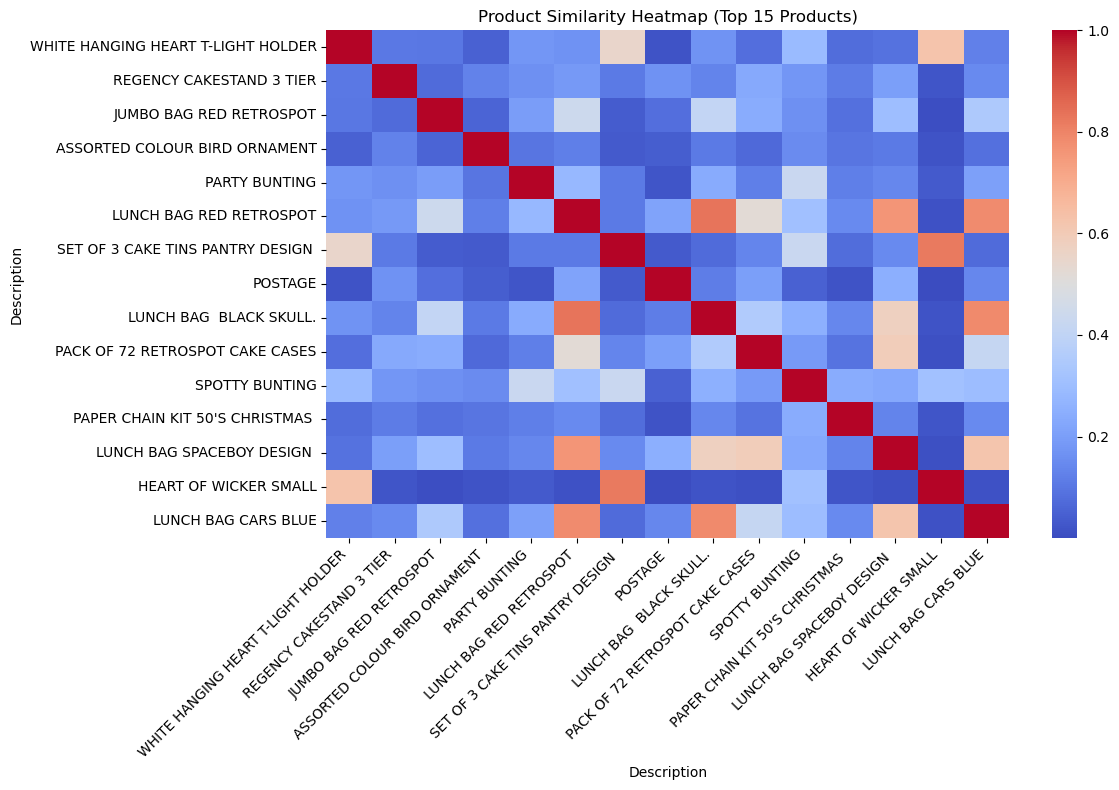

In [38]:
# Create a Customer-Product matrix
basket = data_cleaned.pivot_table(index='CustomerID', columns='Description', values='Quantity', aggfunc='sum', fill_value=0)

# Compute cosine similarity matrix between products
product_similarity = cosine_similarity(basket.T)  # Transpose to get products on rows
product_similarity_df = pd.DataFrame(product_similarity, index=basket.columns, columns=basket.columns)

# Select top 10-15 popular products to keep heatmap readable
top_products = data_cleaned['Description'].value_counts().head(15).index
filtered_similarity = product_similarity_df.loc[top_products, top_products]

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_similarity, cmap='coolwarm', annot=False, xticklabels=True, yticklabels=True)
plt.title("Product Similarity Heatmap (Top 15 Products)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insights:**
1. Clear Clusters of Similar Products:
- Lunch Bags Cluster:
   - Lunch Bag Red Retrospot, Lunch Bag Spaceboy Design, Lunch Bag Cars Blue, and Lunch Bag Black Skull show consistently higher similarity scores with each other (lighter blue to orange shades).
   - Interpretation: These products are frequently bought together or appeal to the same customers.
   - Action: Consider bundling them, promoting “collect all designs,” or recommending similar lunch bags during checkout.

- Party & Baking Items Cluster:
   - Party Bunting, Spotty Bunting, Paper Chain Kit 50’s Christmas, and Pack of 72 Retrospot Cake Cases also show moderate to strong similarity.
   - Interpretation: These items are often purchased for parties and celebrations.
   - Action: Offer “party packs” or themed recommendations.

2. Niche or Standalone Items:
- Postage has very low similarity to almost everything (dark blue), indicating it is more of a service fee than a product.
- Heart of Wicker Small and Assorted Colour Bird Ornament show low similarity with other items, suggesting they are unique or gift items.
- Action: Promote these as special feature products or gifts rather than bundled items.

3. Moderate Cross-Category Links:
- Set of 3 Cake Tins Pantry Design and Regency Cake Stand have moderate similarity with multiple other products.
- Interpretation: These are versatile items that connect baking and kitchen decor.
- Action: Use them as anchor products for cross-selling into multiple categories.



## ***Clustering Methodology***

### Feature Engineering:
Feature Engineering is already performed in EDA step

### Standardize the RFM values

In [40]:
# Selecting only RFM features for clustering
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
rfm_scaled = scaler.fit_transform(rfm_features)

# Convert back to a DataFrame
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])

# Preview
rfm_scaled_df.head()

,Recency,Frequency,Monetary
0,2.334574,-0.425097,8.363010
1,-0.905340,0.354417,0.251699
2,-0.175360,-0.035340,-0.027988
3,-0.735345,-0.425097,-0.032406
4,2.174578,-0.425097,-0.190812


### Choose Clustering Algorithm (KMeans, DBScan, Hierarchial etc)

**Chosen Algorithm: KMeans Clustering**

Why KMeans?

**KMeans** is the most suitable algorithm for your e-commerce RFM customer segmentation because:
- It aligns well with your structured and scaled numerical data.
- It enables you to easily label and interpret customer segments.
- It provides a foundation for further visualizations and marketing strategies.

### Elbow Method , Silhouette Score to decide the number of clusters

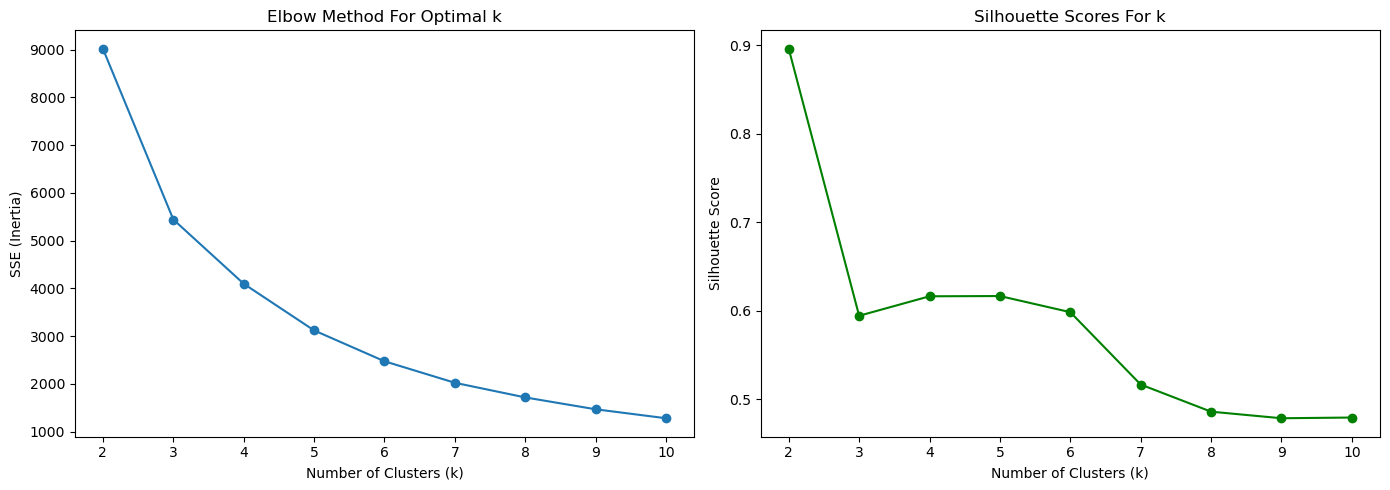

In [41]:
# Use already scaled data
sse = []
silhouette_scores = []
K = range(2, 11)  # Try clusters from 2 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)
    score = silhouette_score(rfm_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plot Elbow Curve (SSE)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(K, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method For Optimal k')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='o', color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For k')

plt.tight_layout()
plt.show()


**Insights:**
1. Elbow Method Insights (Left Plot)
- SSE (Inertia) decreases steeply from k=2 to k=4, indicating significant improvement in cluster compactness.
- Beyond k=4, the SSE continues to decrease but at a much slower rate, showing diminishing returns.
- Visual Elbow Point: Around k=4 or k=5, where the curve flattens noticeably.
- Interpretation: Adding clusters beyond k=4–5 yields relatively minor improvements in fit.

2. Silhouette Score Insights (Right Plot)
- Highest silhouette score at k=2 (~0.90) — excellent cluster separation.
- Sharp drop in silhouette when moving to k=3 (~0.60).
- Scores stabilize between k=4–6 (~0.60), then decline further beyond k=7 (<0.52).
- Interpretation: While k=2 provides the cleanest separation, it likely under-segments the data.
- k=4–5 maintain a balance between separation and practical segmentation.

**Cluster decided**
- k=4 clusters is the optimal balance, because:
- The elbow point in SSE suggests k=4.
- Silhouette score remains reasonably high (~0.60).
- This provides more granularity than k=2 without overcomplicating segmentation.

### Run Clustering and Label the Segments

In [42]:
# Apply KMeans with k=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [43]:
# Aggregate mean RFM scores by cluster
cluster_profiles = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(2)

# Count customers per cluster
cluster_counts = rfm['Cluster'].value_counts().sort_index()
cluster_profiles['Num_Customers'] = cluster_counts

# Display profiles
print(cluster_profiles)


         Recency  Frequency   Monetary  Num_Customers
Cluster                                              
0          43.70       3.68    1353.63           3054
1         248.08       1.55     478.85           1067
2           7.38      82.54  127187.96             13
3          15.50      22.33   12690.50            204


In [44]:
# Label clusters manually based on your insight
def label_segment(row):
    if row.name == 2:
        return "High-Value"
    elif row.name == 3:
        return "Regular"
    elif row.name == 0:
        return "Occasional"
    elif row.name == 1:
        return "At-Risk"

cluster_profiles['Segment_Label'] = cluster_profiles.apply(label_segment, axis=1)
print(cluster_profiles)


         Recency  Frequency   Monetary  Num_Customers Segment_Label
Cluster                                                            
0          43.70       3.68    1353.63           3054    Occasional
1         248.08       1.55     478.85           1067       At-Risk
2           7.38      82.54  127187.96             13    High-Value
3          15.50      22.33   12690.50            204       Regular


###  Visualize the clusters using a scatter plot or 3D plot of RFM scores.

#### 2D Scatter Plot: Frequency vs Monetary

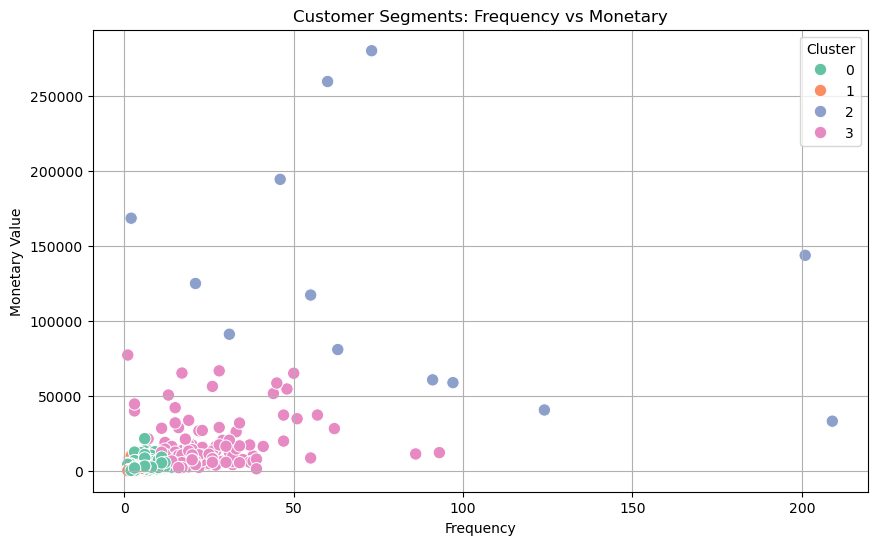

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Cluster', palette='Set2', s=80)
plt.title('Customer Segments: Frequency vs Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

**Insights:**
1. Cluster 0 (green):
- Customers with very low frequency and low spending.
- Located in the bottom-left corner.
- Interpretation:
  -  Occasional buyers with minimal monetary contribution.
  - Possibly one-time or low-engagement customers.
- Action:
  - Target with reactivation campaigns or introductory offers.

2. Cluster 1 (orange):
- Very few points, almost overlapping with Cluster 0.
- Also low frequency and low spending—similar to Cluster 0.
- Interpretation:
  - Possibly new or inactive customers.
- Action:
  - Monitor for potential engagement growth or merge with Cluster 0 strategies.

3. Cluster 2 (blue):
- Customers with high frequency and high monetary value.
- Spread widely along both axes, including the top-right quadrant.
- Some customers have extremely high monetary values (>200,000) and frequent purchases.
- Interpretation:
  - Top customers / VIP segment.
  - Drive substantial revenue and repeat business.
- Action:
  - Prioritize loyalty programs, exclusive offers, and personal engagement.

4. Cluster 3 (pink):
- Moderate frequency and moderate to high spending.
- Clustered in the middle zone of the plot.
- Interpretation:
  - Regular customers with significant value, but not as frequent or high-spending as Cluster 2.
- Action:
  - Upsell and nurture toward Cluster 2.
  - Use personalized recommendations to increase frequency.

**Overall Interpretation:**
- Clusters 2 and 3 are the most valuable customers driving revenue.
- Clusters 0 and 1 are low-value customers, representing an opportunity to grow engagement.
- The distribution highlights clear segmentation across engagement and spend.



#### 2D Scatter Plot: Recency vs Frequency

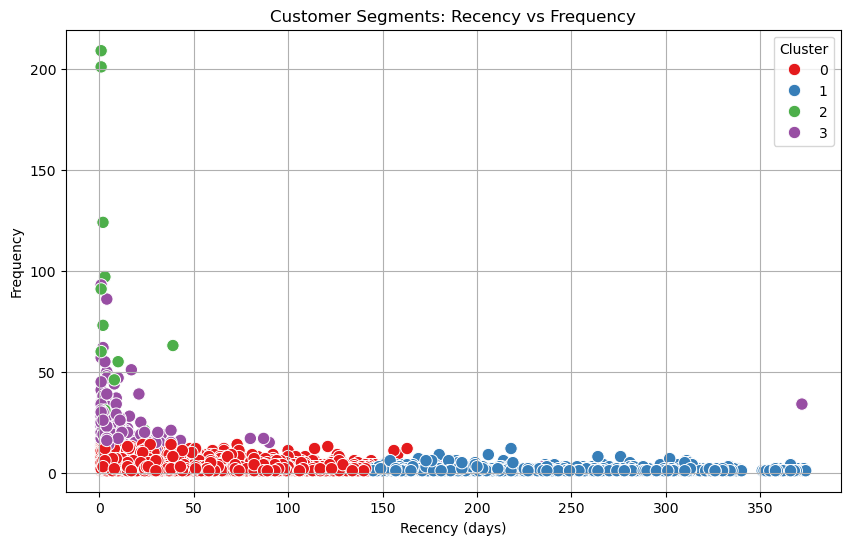

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Cluster', palette='Set1', s=80)
plt.title('Customer Segments: Recency vs Frequency')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


**Insights:**
1. Cluster 2 (Green):
- Located in the top-left quadrant (very low recency and very high frequency).
- These customers purchase often and very recently.
- Interpretation:
  - Your most engaged, loyal customers.
- Action:
  - Prioritize with loyalty rewards, VIP programs, and personalized offers.

2. Cluster 3 (Purple):
- Also low recency but moderate frequency.
- Slightly more spread across frequency levels.
- Interpretation:
  - Active and recent customers, though slightly less frequent than Cluster 2.
- Action:
  - Nurture with targeted campaigns to increase purchase frequency.

3. Cluster 0 (Red):
- Mid-range recency (30–150 days) and low frequency.
- These customers have purchased somewhat recently but not frequently.
- Interpretation:
  - Occasional buyers—potential to increase engagement.
- Action:
  - Encourage repeat purchases with reminders or incentives.

4. Cluster 1 (Blue):
- High recency (>150 days)—these customers haven’t bought in a long time.
- Very low frequency—mostly 1–2 purchases.
- Interpretation:
  - Inactive/lost customers.
- Action:
  - Win-back campaigns (special offers, “We miss you” emails).

**Overall Insights:**
- The Recency-Frequency distribution shows clear stratification:
1. Cluster 2: Loyal and active.
2. Cluster 3: Active but less frequent.
3. Cluster 0: Some engagement, but infrequent.
4. Cluster 1: Lapsed/inactive customers.

This segmentation provides clear guidance for personalized marketing and retention strategies.

#### 3D Scatter Plot: Recency vs Frequency vs Monetary

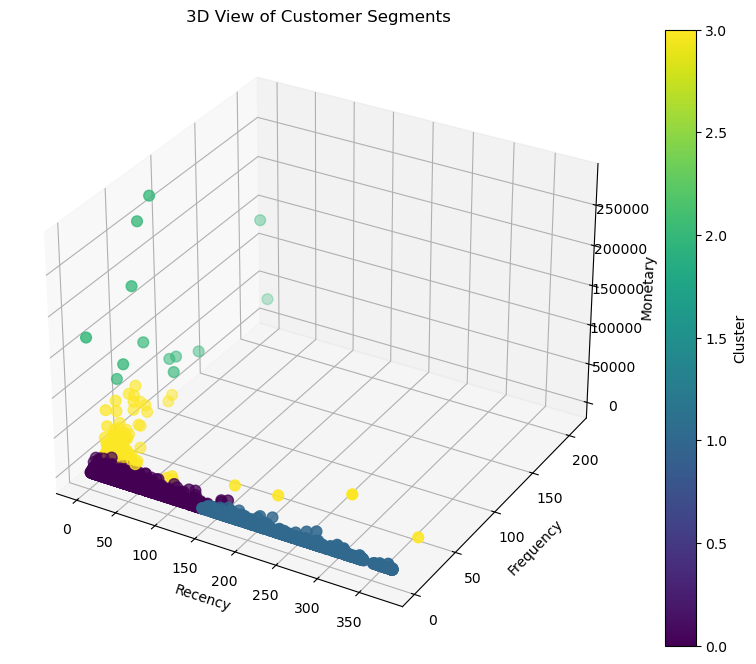

In [47]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    rfm['Recency'], rfm['Frequency'], rfm['Monetary'],
    c=rfm['Cluster'], cmap='viridis', s=60
)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D View of Customer Segments')
plt.colorbar(scatter, label='Cluster')
plt.show()


**Insights:**

1. Cluster 0 (Dark Purple):
- High Recency (i.e., customers haven’t purchased in a long time).
- Low Frequency and low Monetary.
- Concentrated near the origin of Frequency/Monetary but stretched along Recency.
- Interpretation:
   - Inactive low-value customers.
- Action:
   - Win-back campaigns or re-engagement efforts.

2. Cluster 1 (Blue):
- Also higher Recency, low Frequency and Monetary.
- Slightly denser than Cluster 0.
- Interpretation:
  - Likely dormant or occasional buyers.
- Action:
  - Target with reminders or limited-time offers.

3. Cluster 2 (Green):
- Very low Recency (recent purchases).
- Very high Frequency and extremely high Monetary value.
- Clearly elevated along the Monetary axis.
- Interpretation:
   - Top-tier VIP customers.
- Action:
   - Prioritize loyalty rewards, exclusive deals, and retention strategies.

4. Cluster 3 (Yellow):
- Low to moderate Recency.
- Medium Frequency and Monetary.
- Mid-level position in the 3D space.
- Interpretation:
   - Active, valuable customers but not as frequent or high-spending as Cluster 2.
- Action:
  - Upsell and nurture to move them toward Cluster 2.

**Overall Insights:**
- The RFM model successfully segments customers into clear behavioral groups.
- Cluster 2 (green) is your highest-value customer base, combining recency, frequency, and monetary.
- Clusters 0 and 1 are low-value and at risk of churn.
- Cluster 3 is moderately engaged with potential for growth.



## ***Save the KMeans model and scaler***

In [48]:
import joblib

# Save the fitted scaler
joblib.dump(scaler, 'rfm_scaler.pkl')

# Save the trained KMeans model
joblib.dump(kmeans, 'kmeans_model.pkl')

print(" Models saved successfully.")

 Models saved successfully.


## ***Conclusion***

The “Shopper Spectrum” project successfully demonstrates the power of data-driven strategies in e-commerce through two core components: customer segmentation and product recommendation.

Using RFM analysis and clustering algorithms like K-Means, we effectively grouped customers into meaningful segments such as High-Value, Regular, Occasional, and At-Risk. These insights can help businesses tailor marketing campaigns, improve customer retention, and allocate resources more efficiently.

In parallel, the collaborative filtering recommendation system provides personalized product suggestions, enhancing the shopping experience and driving potential sales.

The interactive Streamlit dashboard makes these insights accessible to business stakeholders, enabling strategic decision-making in real time.

This end-to-end system showcases the practical application of machine learning and analytics in improving customer engagement, revenue generation, and overall business performance in the competitive e-commerce space.

 # <h1 align="center"><b>THANK YOU😊</b> </h1>
